#### Zadanie 1: Analiza wpływu struktury gramatycznej na toksyczność komentarzy
Przeprowadź analizę zależności składniowych (dependency parsing). Porównaj złożoność struktury gramatycznej w komentarzach o wysokiej i niskiej toksyczności. Przedstaw wyniki na wykresie pudełkowym, aby zobaczyć różnice w złożoności składniowej.

#### Zadanie 2: Identyfikacja kluczowych czynników toksyczności na podstawie NER i zależności składniowych
Przeanalizuj najbardziej toksyczne komentarze pod kątem nazwanych jednostek (NER) oraz zależności składniowych (dependency parsing). Zidentyfikuj, jakie nazwane jednostki są najczęściej w toksycznych komentarzach i w jaki sposób struktura zależności przyczynia się do toksyczności. Przedstaw wyniki w postaci drzew zależności i statystyk.


#### Zadanie 3: Analiza stylu narracyjnego na podstawie zależności składniowych
Przeprowadź analizę zależności składniowych dla zdań z obu książek. Porównaj złożoność składniową obu tekstów (np. liczba podmiotów, dopełnień, orzeczeń w jednym zdaniu) i przedstaw wyniki na wykresach oraz wizualizacjach drzew składniowych.

#### Zadanie 4: Analiza tematyczna na podstawie NER i lematyzacji – porównanie podejścia do postaci i miejsc w obu książkach
Wykorzystaj NER i lematyzację, aby porównać, w jaki sposób "Anna Karenina" i "Jane Eyre" traktują postaci i miejsca. Zidentyfikuj najczęściej wspominane jednostki i zanalizuj ich kontekst. Wyniki przedstaw w formie chmur słów i raportu porównawczego.

In [47]:
#ZAD1

import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

nlp = spacy.load('en_core_web_sm')
sia = SentimentIntensityAnalyzer()

In [56]:
data = pd.read_csv('sample.csv')

doc = data['comment_text'].apply(lambda text: nlp(text))

In [59]:
def analyze_toxicity(text):
    toxicity_score = sia.polarity_scores(text)
    if toxicity_score['compound'] >= 0.05:
        return 'positive'
    elif toxicity_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
data['toxicity'] = data['comment_text'].apply(analyze_toxicity)

sentimental_toxicity = data.groupby('sentiment')['target'].mean()

In [60]:
def calculate_complexity(text):
    doc = nlp(text)
    return len([token for token in doc if token.dep_ != 'punct'])

data['complexity'] = data['comment_text'].apply(calculate_complexity)

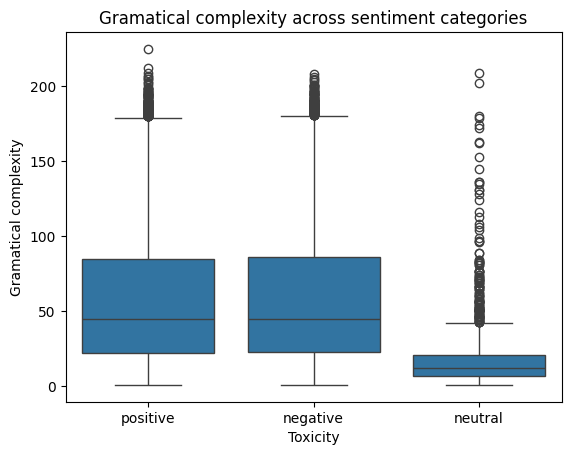

In [61]:
complexity_toxicity = data.groupby('complexity')['target'].mean()

sns.boxplot(x='sentiment', y='complexity', data=data)
plt.title('Gramatical complexity across sentiment categories')
plt.ylabel('Gramatical complexity')
plt.xlabel('Toxicity')
plt.show()

In [4]:
#ZAD2
#Załadowanie modelu
nlp = spacy.load('en_core_web_sm')

#Załadowanie danych
data = pd.read_csv('sample.csv')

#Tworzenie obiektów 'doc' za pomocą za pomocą wybranego modelu
data['doc'] = data['comment_text'].apply(lambda text: nlp(text))

In [5]:
#Funkcję do wyliczenia zależności i jednostek
def extract_dependencies(doc):
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]
    return dependencies

def extract_entities(doc):
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [6]:
#Zastosowanie wcześniej utworzonych funkcji
data['dependencies'] = data['doc'].apply(extract_dependencies)
data['entities'] = data['doc'].apply(extract_entities)

In [7]:
#Wizualizacja (w tym wypadku pierwszego komentarza)
def dependency_visualization_tree(text):
    doc = nlp(text)
    displacy.render(doc, style='dep', jupyter=True)

dependency_visualization_tree(data['comment_text'].iloc[0])

In [10]:
#Obliczanie złożoności zdań
data['dependency_count'] = data['doc'].apply(lambda doc: len([token for token in doc if token.dep_ != 'punct']))

#Częstotliwość zależności etykiet
def count_dependency_label(text):
    dep_labels = [token.dep_ for doc in text for token in doc]
    return Counter(dep_labels)

dependency_counts = count_dependency_label(data['doc'])

#Częstotliwość zależności jednostek
def count_entity_label(text):
    ext_labels = [ent.label_ for doc in text for ent in doc.ents]
    return Counter(ext_labels)

entity_counts = count_entity_label(data['doc'])

In [12]:
#Wyświetlanie wyników
print(dependency_counts)
print(entity_counts)
print(data['dependency_count'].mean())

Counter({'punct': 74126, 'nsubj': 51628, 'prep': 48907, 'det': 47148, 'pobj': 45934, 'ROOT': 35585, 'advmod': 31135, 'amod': 30602, 'dobj': 30008, 'aux': 28744, 'compound': 21394, 'conj': 18776, 'cc': 18095, 'dep': 17863, 'ccomp': 12216, 'poss': 10170, 'advcl': 9514, 'mark': 9075, 'attr': 8267, 'neg': 8166, 'xcomp': 7240, 'relcl': 6764, 'acomp': 6750, 'auxpass': 4508, 'nummod': 4043, 'pcomp': 3659, 'nsubjpass': 3633, 'npadvmod': 3500, 'acl': 3480, 'appos': 3176, 'prt': 2852, 'nmod': 2332, 'case': 2193, 'intj': 1500, 'expl': 1286, 'agent': 990, 'quantmod': 858, 'csubj': 818, 'dative': 669, 'predet': 647, 'oprd': 638, 'parataxis': 336, 'preconj': 276, 'meta': 116, 'csubjpass': 22})
Counter({'ORG': 6808, 'PERSON': 6520, 'GPE': 4663, 'DATE': 3079, 'NORP': 3028, 'CARDINAL': 2851, 'MONEY': 700, 'ORDINAL': 611, 'PERCENT': 521, 'LOC': 504, 'WORK_OF_ART': 313, 'TIME': 253, 'PRODUCT': 224, 'FAC': 223, 'LAW': 167, 'EVENT': 131, 'QUANTITY': 125, 'LANGUAGE': 57})
54.5513


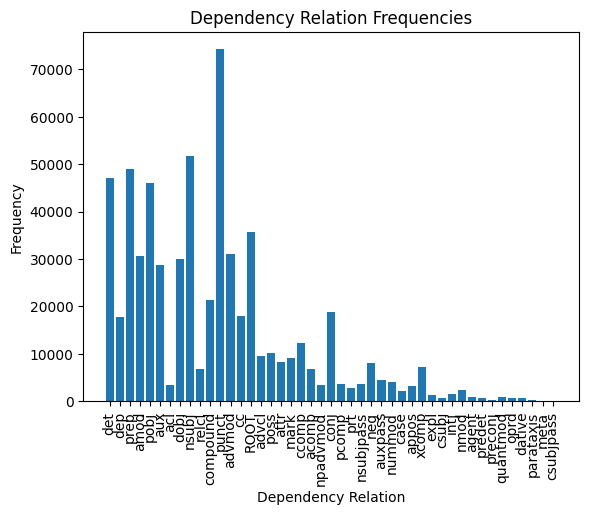

In [14]:
#Częstotliwość relacji zależności
plt.bar(dependency_counts.keys(), dependency_counts.values())
plt.title('Dependency Relation Frequencies')
plt.xlabel('Dependency Relation')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

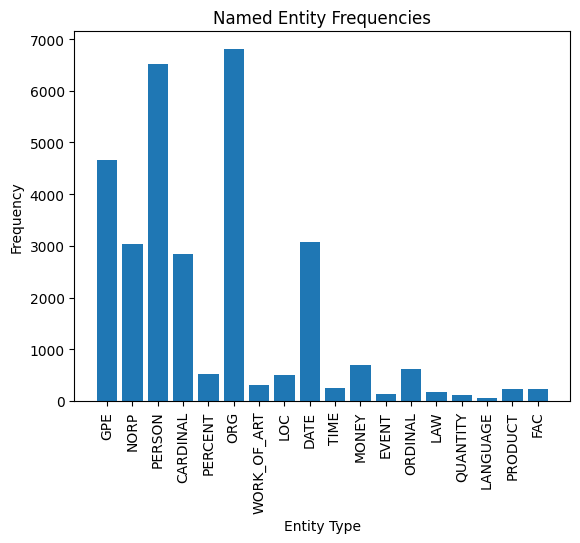

In [15]:
#Częstotliwość nazywanych obiektów
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Named Entity Frequencies')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#ZAD3
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 2_000_000

with open('anna_karenina.txt', 'r', encoding='utf-8') as f:
    anna_text = f.readlines()

with open('jane_eyre.txt', 'r', encoding='utf-8') as f:
    jane_text = f.readlines()

anna_text_sentence = [''.join(anna_text[i:i + 500_000]) for i in range(0, len(anna_text), 500_000)]
jane_text_sentence = [''.join(jane_text[i:i + 500_000]) for i in range(0, len(jane_text), 500_000)]

def preprocess_text(chunks, max_sentences=100):
    sentences = []
    for chunk in chunks:
        doc = nlp(chunk)
        sentences.extend(list(doc.sents))
        if len(sentences) >= max_sentences:
            break
    return sentences[:max_sentences]

anna_sentences = preprocess_text(anna_text_sentence)
jane_sentences = preprocess_text(jane_text_sentence)

print("Anna Karenina trees:")
displacy.render(anna_sentences[:3], style='dep', jupyter=True)
print("Jane Eyre trees:")
displacy.render(jane_sentences[:3], style='dep', jupyter=True)

In [43]:
def extract_syntactic_info(sentences):
    syntactic_info = {
        'subjects': 0,
        'objects': 0,
        'predicates': 0,
        'others': 0,
        'total_dependencies': []
    }

    for sentence in sentences:
        num_dependencies = 0
        for token in sentence:
            if token.dep_ == 'nsubj':
                syntactic_info['subjects'] += 1
            elif token.dep_ == 'dobj':
                syntactic_info['objects'] += 1
            elif token.dep_ == 'ROOT':
                syntactic_info['predicates'] += 1
            else: syntactic_info['others'] += 1
            num_dependencies += 1

        syntactic_info['total_dependencies'].append(num_dependencies)

    return syntactic_info

In [44]:
analyze_anna = extract_syntactic_info(anna_sentences)
analyze_jane = extract_syntactic_info(jane_sentences)

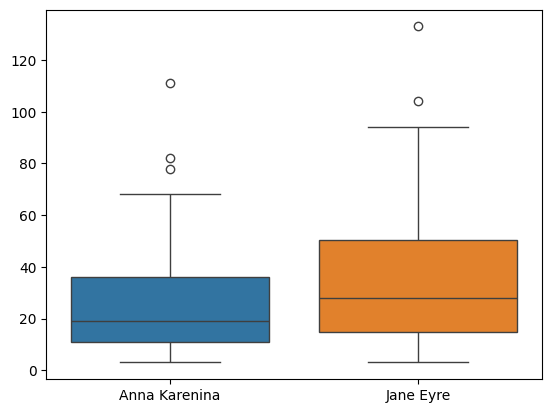

In [45]:
sns.boxplot(data = [analyze_anna['total_dependencies'], analyze_jane['total_dependencies']])
plt.xticks([0, 1], ['Anna Karenina', 'Jane Eyre'])
plt.show()

In [46]:
#Results
print("Anna results:")
print(f"Subjects:{analyze_anna['subjects']}")
print(f"Objects:{analyze_anna['objects']}")
print(f"Predicates:{analyze_anna['predicates']}")
print(f"Others:{analyze_anna['others']}")

print("-------------------------")

print("Jane results:")
print(f"Subjects:{analyze_jane['subjects']}")
print(f"Objects:{analyze_jane['objects']}")
print(f"Predicates:{analyze_jane['predicates']}")
print(f"Others:{analyze_jane['others']}")

Anna results:
Subjects:169
Objects:92
Predicates:100
Others:2210
-------------------------
Jane results:
Subjects:247
Objects:164
Predicates:100
Others:3093


Analyzing characters...


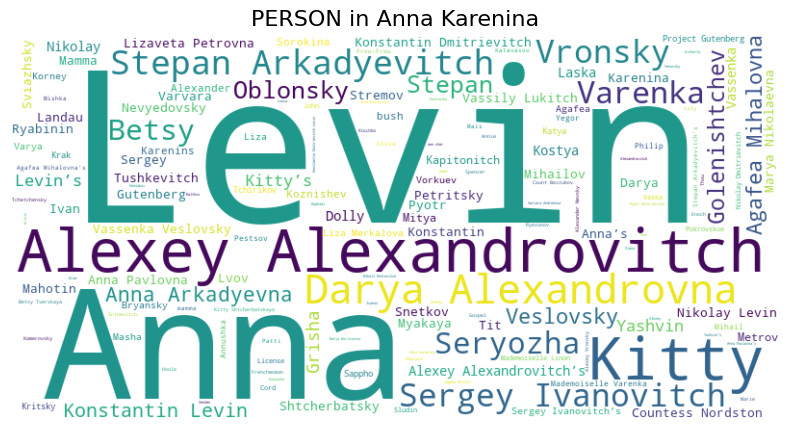

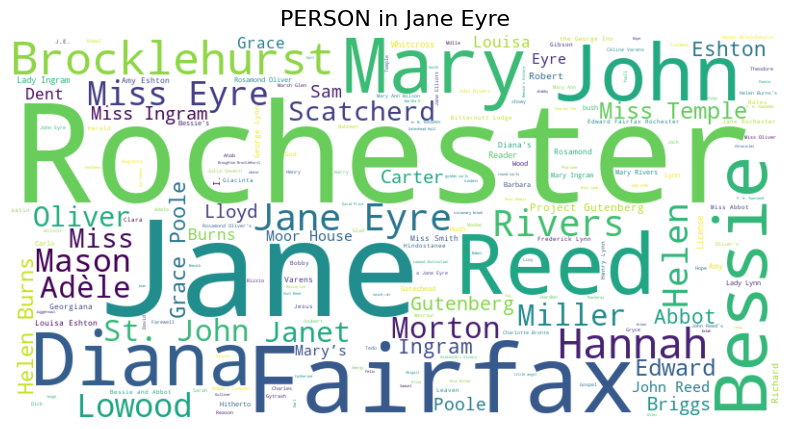

Top PERSON in Anna Karenina:
[('Levin', 1411), ('Anna', 610), ('Alexey Alexandrovitch', 368), ('Kitty', 360), ('Darya Alexandrovna', 177), ('Stepan Arkadyevitch', 147), ('Vronsky', 127), ('Varenka', 119), ('Sergey Ivanovitch', 117), ('Seryozha', 110)]

Top PERSON in Jane Eyre:
[('Rochester', 303), ('Jane', 285), ('Fairfax', 110), ('Reed', 87), ('John', 74), ('Mary', 70), ('Diana', 67), ('Bessie', 62), ('Brocklehurst', 45), ('Hannah', 39)]

Analyzing places...


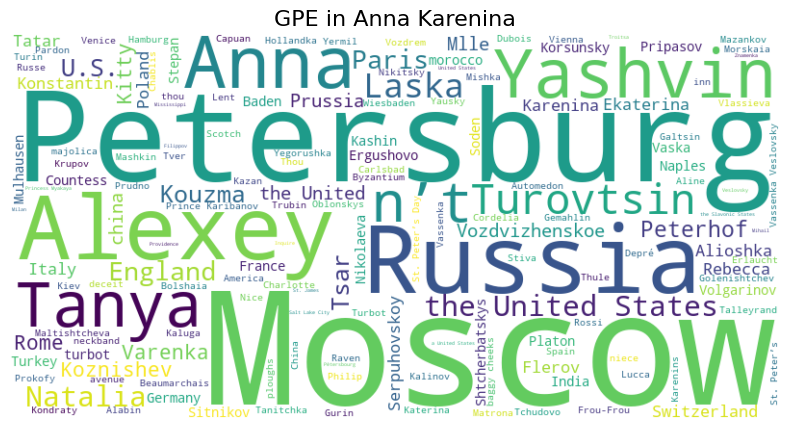

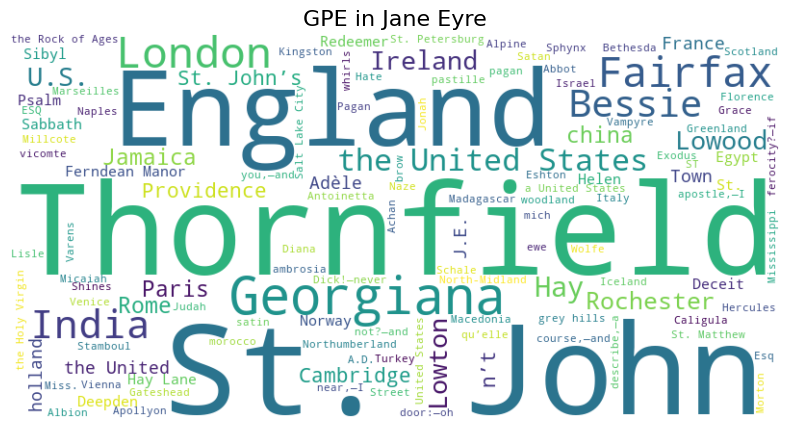

Top GPE in Anna Karenina:
[('Moscow', 173), ('Petersburg', 117), ('Russia', 57), ('Alexey', 50), ('Anna', 31), ('Yashvin', 28), ('Tanya', 24), ('n’t', 19), ('Turovtsin', 19), ('Laska', 11)]

Top GPE in Jane Eyre:
[('Thornfield', 56), ('St. John', 53), ('England', 37), ('Georgiana', 33), ('London', 22), ('Fairfax', 21), ('India', 18), ('Bessie', 16), ('the United States', 10), ('Lowood', 7)]



In [56]:
#ZAD4
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2_000_000

with open('anna_karenina.txt', 'r', encoding='utf-8') as f:
    anna_text = f.readlines()

with open('jane_eyre.txt', 'r', encoding='utf-8') as f:
    jane_text = f.readlines()

anna_text_sentence = [''.join(anna_text[i:i + 500_000]) for i in range(0, len(anna_text), 500_000)]
jane_text_sentence = [''.join(jane_text[i:i + 500_000]) for i in range(0, len(jane_text), 500_000)]

def extract_named_entities_from_chunks(chunks, entity_type=None):
    entities = []
    for chunk in chunks:
        doc = nlp(chunk)
        entities.extend([ent.text for ent in doc.ents if not entity_type or ent.label_ == entity_type])
    return entities

def sanitize_entities(entities):
    return [entity.replace("\n", " ").strip() for entity in entities]

def generate_word_cloud(entities, title):
    sanitized_entities = sanitize_entities(entities)
    word_freq = Counter(sanitized_entities)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

def analyze_books(book1_chunks, book2_chunks, book1_name, book2_name, entity_type):

    book1_entities = extract_named_entities_from_chunks(book1_chunks, entity_type)
    book2_entities = extract_named_entities_from_chunks(book2_chunks, entity_type)

    generate_word_cloud(book1_entities, f"{entity_type} in {book1_name}")
    generate_word_cloud(book2_entities, f"{entity_type} in {book2_name}")

    book1_counter = Counter(book1_entities)
    book2_counter = Counter(book2_entities)

    print(f"Top {entity_type} in {book1_name}:")
    print(book1_counter.most_common(10))
    print()
    print(f"Top {entity_type} in {book2_name}:")
    print(book2_counter.most_common(10))
    print()

print("Analyzing characters...")
analyze_books(anna_text, jane_text, "Anna Karenina", "Jane Eyre", "PERSON")

print("Analyzing places...")
analyze_books(anna_text, jane_text, "Anna Karenina", "Jane Eyre", "GPE")
